Importing districts.csv file into a dataframe and creating a list of dates between 15-03-2020 and 14-08-2021

In [1]:
import pandas as pd
dist_data = pd.read_csv('districts.csv')
date_lst=pd.date_range(start="15-03-2020",end="14-08-2021").to_pydatetime().tolist()
for i in range(len(date_lst)):
    date_lst[i]=date_lst[i].strftime("%Y-%m-%d")

Importing neighbor-districts-modified.json file and extracting district keys from it

In [2]:
import json
with open('neighbor-districts-modified.json') as json_file:
    data = json.load(json_file)
dist_keys = list(data.keys())

Appending extra key for Delhi as we don't exclusively need in the cowin vaccination data. So, just appending here as it is only merged in districts.csv file

In [3]:
dist_keys.insert(137,"DL_Delhi")

Getting district names from the district keys to match with the District column of districts.csv file

In [4]:
dist_keys_spl = dist_keys.copy()
for i in range(len(dist_keys_spl)):
    dist_keys_spl[i]=dist_keys_spl[i].split('_')[1]

Creating a list of duplicate districts keys

In [5]:
dupl_lst= ['HP_Hamirpur','UP_Hamirpur','CT_Bilaspur','HP_Bilaspur','UP_Balrampur','CT_Balrampur','MH_Aurangabad','BR_Aurangabad',
                'RJ_Pratapgarh','UP_Pratapgarh']

Creating a dictionary with state name as keys and state code as values for adding district keys to duplicate districts

In [6]:
dat = {'Himachal Pradesh':'HP','Bihar':'BR','Chhattisgarh':'CT','Uttar Pradesh':'UP','Maharashtra':'MH','Rajasthan':'RJ'}

Creating a column to add in the dataframe consisting of District_Keys

In [7]:
dist_names = [0]*len(dist_data)
for i in range(len(dist_data)):
    if dist_data['District'][i] in dist_keys_spl:
        k=dist_keys_spl.index(dist_data['District'][i])
        dist_names[i] = dist_keys[k]

Replacing the duplicate district names list with their appropriate district keys

In [8]:
for i in range(len(dist_data)):
    if dist_names[i] in dupl_lst:
        k=dist_keys.index(dist_names[i])
        dist_names[i] = dat[dist_data['State'][i]]+ '_' +dist_keys_spl[k]

Inserting the District_Keys column into the dataframe

In [9]:
dist_data.insert(3, "District_Key", dist_names, True)

Creating a list of lists containing indices of all occured dates 

In [10]:
indices = [None]*len(date_lst)
for i in range(len(date_lst)):
    indices[i]=[x for x,val in enumerate(dist_data['Date']) if val == date_lst[i]]

Creating a list of lists containing indices of all districts

In [11]:
indices_dist = [None]*len(dist_keys)
for i in range(len(dist_keys)):
    indices_dist[i]=[x for x,val in enumerate(dist_data['District_Key']) if val == dist_keys[i]]

Creating new column consisting of active cases (i.e. confirmed - recovered - deceased)

In [12]:
active_perday=[0]*len(dist_data)
for i in range(len(dist_data)):
    active_perday[i]=int(dist_data['Confirmed'][i])-int(dist_data['Recovered'][i])-int(dist_data['Deceased'][i])

Inserting the created column into the dataframe

In [13]:
dist_data.insert(8, "PerDayActive", active_perday, True)
dist_data

,Date,State,District,District_Key,Confirmed,Recovered,Deceased,Other,PerDayActive,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,0,33,11,0,0,22,NaN
1,2020-04-26,Andhra Pradesh,Anantapur,AP_Anantapur,53,14,4,0,35,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,AP_Chittoor,73,13,0,0,60,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,AP_East Godavari,39,12,0,0,27,NaN
4,2020-04-26,Andhra Pradesh,Guntur,AP_Guntur,214,29,8,0,177,NaN
...,...,...,...,...,...,...,...,...,...,...
319085,2021-09-01,West Bengal,Purba Bardhaman,WB_Purba Bardhaman,40613,40161,187,0,265,NaN
319086,2021-09-01,West Bengal,Purba Medinipur,WB_Purba Medinipur,61697,60774,382,0,541,NaN
319087,2021-09-01,West Bengal,Purulia,WB_Purulia,19280,19118,113,0,49,NaN
319088,2021-09-01,West Bengal,South 24 Parganas,WB_South 24 Parganas,97737,95765,1287,0,685,NaN


Creating list of lists with each inside list corresponding to a date and containing number of daily  Active cases of all districts for that day

In [14]:
actdate_cases=[[0]*len(dist_keys)]*len(date_lst)

Filling number of Active cases values in the actdate_cases list of lists

In [15]:
for i in range(len(date_lst)):
    tmp=[0]*len(dist_keys)
    for j in range(len(dist_keys)):
        k=set(indices[i])&set(indices_dist[j])
        k=list(k)
        if len(k)==0:
            continue
        tmp[j]= dist_data['PerDayActive'][k[0]]
    actdate_cases[i]=tmp

Changing Negative Values to 0

In [16]:
for i in range(len(date_lst)):
    for j in range(len(dist_keys)):
        if actdate_cases[i][j] < 0 :
            actdate_cases[i][j] = 0

Converting actdate_cases to a dataframe and adding Date column

In [17]:
daily_data=pd.DataFrame(actdate_cases, columns = dist_keys)
daily_data.insert(0,"Date",date_lst,True)
daily_data

,Date,AP_Anantapur,AP_Chittoor,AP_East Godavari,AP_Guntur,AP_Krishna,AP_Kurnool,AP_Prakasam,AP_S.P.S. Nellore,AP_Srikakulam,...,WB_Murshidabad,WB_Nadia,WB_North 24 Parganas,WB_Paschim Bardhaman,WB_Paschim Medinipur,WB_Purba Bardhaman,WB_Purba Medinipur,WB_Purulia,WB_South 24 Parganas,WB_Uttar Dinajpur
0,2020-03-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-08-10,242,2968,3183,1596,3153,232,1563,2583,520,...,60,660,1213,200,602,352,689,56,641,120
514,2021-08-11,247,2778,3065,1605,3111,216,1470,2591,557,...,58,648,1213,203,595,342,692,55,658,126
515,2021-08-12,252,2783,3057,1609,3132,180,1487,2595,564,...,63,635,1186,198,601,333,689,53,678,123
516,2021-08-13,244,2746,3085,1576,3062,146,1386,2694,598,...,63,631,1178,197,595,322,680,53,689,123


Extracting District IDs from the dataframe

In [18]:
dist_names=list(daily_data)
dist_names=dist_names[1:]
dist_names

['AP_Anantapur',
 'AP_Chittoor',
 'AP_East Godavari',
 'AP_Guntur',
 'AP_Krishna',
 'AP_Kurnool',
 'AP_Prakasam',
 'AP_S.P.S. Nellore',
 'AP_Srikakulam',
 'AP_Visakhapatnam',
 'AP_Vizianagaram',
 'AP_West Godavari',
 'AP_Y.S.R. Kadapa',
 'AR_Anjaw',
 'AR_Changlang',
 'AR_East Kameng',
 'AR_East Siang',
 'AR_Kamle',
 'AR_Kra Daadi',
 'AR_Kurung Kumey',
 'AR_Lepa Rada',
 'AR_Lohit',
 'AR_Longding',
 'AR_Lower Dibang Valley',
 'AR_Lower Siang',
 'AR_Lower Subansiri',
 'AR_Namsai',
 'AR_Pakke Kessang',
 'AR_Papum Pare',
 'AR_Shi Yomi',
 'AR_Siang',
 'AR_Tawang',
 'AR_Tirap',
 'AR_Upper Dibang Valley',
 'AR_Upper Siang',
 'AR_Upper Subansiri',
 'AR_West Kameng',
 'AR_West Siang',
 'AS_Baksa',
 'AS_Barpeta',
 'AS_Biswanath',
 'AS_Bongaigaon',
 'AS_Cachar',
 'AS_Charaideo',
 'AS_Chirang',
 'AS_Darrang',
 'AS_Dhemaji',
 'AS_Dhubri',
 'AS_Dibrugarh',
 'AS_Dima Hasao',
 'AS_Goalpara',
 'AS_Golaghat',
 'AS_Hailakandi',
 'AS_Hojai',
 'AS_Jorhat',
 'AS_Kamrup',
 'AS_Kamrup Metropolitan',
 'AS_Karbi

Creating a Week List of all Saturdays, for weeks of all Sundays to Saturdays

In [19]:
weekly1=[None]*int(len(daily_data)/7)
it = list(range(0,518,7))
for i in it:
    #weekly1[it.index(i)] = list(range(i,i+7))
    weekly1[it.index(i)] = i+6
weekly1

[6,
 13,
 20,
 27,
 34,
 41,
 48,
 55,
 62,
 69,
 76,
 83,
 90,
 97,
 104,
 111,
 118,
 125,
 132,
 139,
 146,
 153,
 160,
 167,
 174,
 181,
 188,
 195,
 202,
 209,
 216,
 223,
 230,
 237,
 244,
 251,
 258,
 265,
 272,
 279,
 286,
 293,
 300,
 307,
 314,
 321,
 328,
 335,
 342,
 349,
 356,
 363,
 370,
 377,
 384,
 391,
 398,
 405,
 412,
 419,
 426,
 433,
 440,
 447,
 454,
 461,
 468,
 475,
 482,
 489,
 496,
 503,
 510,
 517]

Creating a Week List of all Wednesdays, for weeks of all Thursdays to Wednesdays

In [20]:
weekly2=[None]*int(len(daily_data)/7 - 1)
it = list(range(4,518,7))
for i in it:
    if i+7 <= it[-1]:
        weekly2[it.index(i)] = i+6
weekly2

[10,
 17,
 24,
 31,
 38,
 45,
 52,
 59,
 66,
 73,
 80,
 87,
 94,
 101,
 108,
 115,
 122,
 129,
 136,
 143,
 150,
 157,
 164,
 171,
 178,
 185,
 192,
 199,
 206,
 213,
 220,
 227,
 234,
 241,
 248,
 255,
 262,
 269,
 276,
 283,
 290,
 297,
 304,
 311,
 318,
 325,
 332,
 339,
 346,
 353,
 360,
 367,
 374,
 381,
 388,
 395,
 402,
 409,
 416,
 423,
 430,
 437,
 444,
 451,
 458,
 465,
 472,
 479,
 486,
 493,
 500,
 507,
 514]

Merging Saturdays and Wednesdays weeks list alternatively

In [21]:
weekly=[None]*int(2*(len(daily_data)/7)-1)
for i in range(0,len(weekly)-2,2):
    weekly[i]=weekly1[int(i/2)]
    weekly[i+1]=weekly2[int(i/2)]
weekly[-1]=weekly1[-1]
weekly

[6,
 10,
 13,
 17,
 20,
 24,
 27,
 31,
 34,
 38,
 41,
 45,
 48,
 52,
 55,
 59,
 62,
 66,
 69,
 73,
 76,
 80,
 83,
 87,
 90,
 94,
 97,
 101,
 104,
 108,
 111,
 115,
 118,
 122,
 125,
 129,
 132,
 136,
 139,
 143,
 146,
 150,
 153,
 157,
 160,
 164,
 167,
 171,
 174,
 178,
 181,
 185,
 188,
 192,
 195,
 199,
 202,
 206,
 209,
 213,
 216,
 220,
 223,
 227,
 230,
 234,
 237,
 241,
 244,
 248,
 251,
 255,
 258,
 262,
 265,
 269,
 272,
 276,
 279,
 283,
 286,
 290,
 293,
 297,
 300,
 304,
 307,
 311,
 314,
 318,
 321,
 325,
 328,
 332,
 335,
 339,
 342,
 346,
 349,
 353,
 356,
 360,
 363,
 367,
 370,
 374,
 377,
 381,
 384,
 388,
 391,
 395,
 398,
 402,
 405,
 409,
 412,
 416,
 419,
 423,
 426,
 430,
 433,
 437,
 440,
 444,
 447,
 451,
 454,
 458,
 461,
 465,
 468,
 472,
 475,
 479,
 482,
 486,
 489,
 493,
 496,
 500,
 503,
 507,
 510,
 514,
 517]

Creating a list of lists of size equal to number of districts and each list inside corresponds to one district and is of size of number of weeks and contains the week wise data for that district

In [22]:
week_cases = [[0]*len(weekly)]*len(dist_names)
for i in range(len(dist_names)):
    wc=[0]*len(weekly)
    for j in range(len(weekly)):
            wc[j] = wc[j] + daily_data[dist_names[i]][weekly[j]]
    week_cases[i]=wc
week_cases

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  37,
  43,
  42,
  54,
  65,
  25,
  40,
  40,
  98,
  75,
  63,
  104,
  172,
  236,
  372,
  553,
  674,
  850,
  676,
  951,
  1033,
  1317,
  1559,
  1823,
  2206,
  4168,
  6877,
  8822,
  7262,
  6925,
  6658,
  6294,
  5590,
  5978,
  5977,
  5924,
  6001,
  5993,
  5397,
  4529,
  3570,
  3058,
  2587,
  2264,
  1938,
  1406,
  1472,
  1713,
  1871,
  1917,
  1805,
  1546,
  1259,
  1150,
  1158,
  1034,
  840,
  694,
  559,
  402,
  302,
  269,
  238,
  191,
  220,
  193,
  184,
  149,
  163,
  140,
  145,
  136,
  116,
  127,
  131,
  78,
  54,
  54,
  66,
  52,
  35,
  35,
  29,
  22,
  24,
  29,
  37,
  38,
  57,
  55,
  53,
  52,
  77,
  105,
  186,
  275,
  325,
  298,
  543,
  821,
  1382,
  1950,
  2948,
  5057,
  7381,
  9685,
  13356,
  14036,
  14544,
  15852,
  15003,
  10265,
  7380,
  5531,
  4001,
  4104,
  2929,
  2477,
  1611,
  1357,
  933,
  763,
  576,
  571,
  635,
  652,
  554,
  490,
  480,
  457,
  

Creating weekid column for the output file actcases-week-comb.csv

In [23]:
week_id = [0]*(len(dist_names)*len(weekly))
lw = len(weekly)
for i in range(len(dist_names)*len(weekly)):
    week_id[i]=(i%lw)+1

Creating districtid column for the output file actcases-week-comb.csv

In [24]:
dist_id = [0]*len(week_id)
lw = len(weekly)
ld = len(dist_names)
i=0
for k in range(len(dist_id)):
    dist_id[k]=dist_names[i]
    if int((k+1)/lw) > i:
        i=i+1 

Creating cases column for the output file actcases-week-comb.csv

In [25]:
week_casedat = []
for i in week_cases:
    for j in i:
        week_casedat.append(j)

Merging districtid,weekid,cases columns into dataframe

In [26]:
data_final = {'districtid':dist_id, 'weekid':week_id, 'cases':week_casedat}
dist_week_data = pd.DataFrame(data_final)
dist_week_data

,districtid,weekid,cases
0,AP_Anantapur,1,0
1,AP_Anantapur,2,0
2,AP_Anantapur,3,0
3,AP_Anantapur,4,0
4,AP_Anantapur,5,0
...,...,...,...
104953,WB_Uttar Dinajpur,143,127
104954,WB_Uttar Dinajpur,144,132
104955,WB_Uttar Dinajpur,145,129
104956,WB_Uttar Dinajpur,146,126


Creating list containing the corresponding date index of last date (i.e. 14 of a month)

In [27]:
monthly=[]
for k in range(len(daily_data)):
    if int(str(daily_data['Date'][k]).split('-')[2]) == 14:
        monthly.append(k-1)
monthly

[29,
 59,
 90,
 120,
 151,
 182,
 212,
 243,
 273,
 304,
 335,
 363,
 394,
 424,
 455,
 485,
 516]

Creating a list of lists of size equal to number of districts and each list inside corresponds to one district and is of size of number of months and contains the month wise data for that district

In [28]:
month_cases = [[0]*len(monthly)]*len(dist_names)
for i in range(len(dist_names)):
    mc=[0]*len(monthly)
    for j in range(len(monthly)):
        mc[j] = mc[j] + daily_data[dist_names[i]][monthly[j]]
    month_cases[i]=mc
month_cases

[[0,
  65,
  236,
  1364,
  6442,
  4288,
  1731,
  775,
  181,
  131,
  22,
  52,
  1157,
  14323,
  1842,
  588,
  244],
 [0,
  68,
  114,
  1629,
  8201,
  8477,
  5836,
  1487,
  492,
  166,
  166,
  447,
  4947,
  22185,
  12296,
  3650,
  2746],
 [0,
  16,
  125,
  2096,
  15872,
  12098,
  7344,
  5192,
  562,
  219,
  79,
  136,
  1558,
  27219,
  19336,
  4586,
  3085],
 [0,
  166,
  175,
  1683,
  7838,
  7750,
  4572,
  2391,
  860,
  308,
  62,
  80,
  3246,
  18409,
  5265,
  2001,
  1576],
 [0,
  133,
  269,
  691,
  3956,
  3074,
  2699,
  2956,
  884,
  347,
  138,
  175,
  2876,
  9654,
  7216,
  2753,
  3062],
 [0,
  277,
  263,
  1567,
  9596,
  4048,
  1253,
  296,
  122,
  99,
  19,
  40,
  1480,
  8859,
  2033,
  407,
  146],
 [0,
  3,
  18,
  414,
  3886,
  14379,
  3752,
  745,
  276,
  65,
  55,
  58,
  1531,
  16899,
  8692,
  3043,
  1386],
 [0,
  31,
  169,
  613,
  5564,
  5077,
  1415,
  940,
  600,
  422,
  62,
  43,
  1939,
  16993,
  6491,
  2458,
  269

Creating the monthid column for actcases-month.csv

In [29]:
month_id = [0]*(len(dist_names)*len(monthly))
lm = len(monthly)
for i in range(len(dist_names)*len(monthly)):
    month_id[i]=(i%lm)+1

Creating districtid column for file actcases-month.csv

In [30]:
distm_id = [0]*len(month_id)
lm = len(monthly)
ld = len(dist_names)
i=0
for k in range(len(distm_id)):
    distm_id[k]=dist_names[i]
    if int((k+1)/lm) > i:
        i=i+1

Creating cases column for file actcases-month.csv

In [31]:
month_casedat = []
for i in month_cases:
    for j in i:
        month_casedat.append(j)

Merging the three columns to a dataframe

In [32]:
data_final = {'districtid':distm_id, 'monthid':month_id, 'cases':month_casedat}
dist_month_data = pd.DataFrame(data_final)
dist_month_data

,districtid,monthid,cases
0,AP_Anantapur,1,0
1,AP_Anantapur,2,65
2,AP_Anantapur,3,236
3,AP_Anantapur,4,1364
4,AP_Anantapur,5,6442
...,...,...,...
12133,WB_Uttar Dinajpur,13,347
12134,WB_Uttar Dinajpur,14,1730
12135,WB_Uttar Dinajpur,15,240
12136,WB_Uttar Dinajpur,16,183


Creating Overall Column  containing cases of last date(i.e. 14-08-2021) for actcases-overall.csv file

In [33]:
overall=[0]*len(dist_names)
for i in range(len(dist_names)):
    overall[i]=overall[i] + daily_data[dist_names[i]][517]
overall

[234,
 2550,
 3122,
 1553,
 2942,
 127,
 1270,
 2644,
 571,
 648,
 212,
 1736,
 601,
 28,
 88,
 30,
 85,
 62,
 7,
 1,
 59,
 132,
 12,
 70,
 34,
 260,
 40,
 12,
 728,
 21,
 14,
 94,
 9,
 23,
 68,
 59,
 148,
 43,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 1,
 1,
 8,
 7,
 1,
 0,
 23,
 7,
 6,
 1,
 5,
 2,
 0,
 13,
 2,
 16,
 6,
 7,
 6,
 1,
 8,
 12,
 2,
 38,
 3,
 7,
 4,
 23,
 1,
 0,
 2,
 3,
 1,
 3,
 13,
 2,
 44,
 18,
 90,
 26,
 4,
 157,
 56,
 61,
 32,
 39,
 58,
 27,
 93,
 9,
 24,
 69,
 44,
 33,
 14,
 33,
 78,
 66,
 11,
 38,
 27,
 25,
 101,
 0,
 478,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 28,
 0,
 0,
 0,
 59,
 2,
 6,
 1,
 0,
 0,
 4,
 1,
 0,
 3,
 0,
 1,
 8,
 1,
 6,
 2,
 3,
 0,
 1,
 4,
 0,
 0,
 4,
 0,
 0,
 3,
 15,
 0,
 16,
 0,
 1,
 43,
 1,
 211,
 684,
 251,
 495,
 32,
 157,
 62,
 514,
 337,
 29,
 45,
 39,
 11,
 48,
 5,
 23,
 9,
 71,
 104,
 23,
 16,
 14,
 34,
 5,
 1,
 1,
 6,
 25,
 90,
 20,
 88,

Merging dist_names and overall columns into dataframe

In [34]:
data_final = {'districtid':dist_names, 'overall-cases':overall}
dist_overall_data = pd.DataFrame(data_final)
dist_overall_data

,districtid,overall-cases
0,AP_Anantapur,234
1,AP_Chittoor,2550
2,AP_East Godavari,3122
3,AP_Guntur,1553
4,AP_Krishna,2942
...,...,...
709,WB_Purba Bardhaman,310
710,WB_Purba Medinipur,679
711,WB_Purulia,52
712,WB_South 24 Parganas,700


Getting the number of weeks and months

In [35]:
max_week=dist_week_data['weekid'].max()
max_month = dist_month_data['monthid'].max()

Getting the average of number of cases per week for each district

In [36]:
avg_week=[0]*int(max_week)
k=0
for i in range(max_week):
    awc=0
    for j in range(len(dist_week_data)):
        if dist_week_data['weekid'][j]== i:
            awc=awc+dist_week_data['cases'][j]
    avg_week[k]=int(awc/max_week)
    k=k+1

Getting the average of number of cases per month for each district

In [37]:
avg_month=[0]*int(max_month)
k=0
for i in range(max_month):
    amc=0
    for j in range(len(dist_month_data)):
        if dist_month_data['monthid'][j]== i:
            amc=amc+dist_month_data['cases'][j]
    avg_month[k]=int(amc/max_month)
    k=k+1

Importing matplotlib and numpy libraries

In [38]:
import matplotlib.pyplot as plt
import numpy as np

Plotting the graph of week number vs. number of average cases of all district per week

'Week-Plot:'

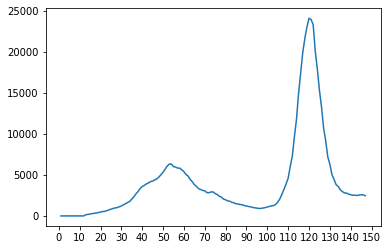

In [39]:
x = list(range(1,max_week+1))
plt.plot(x, avg_week)
plt.yticks(np.arange(0, 25001, 5000))
plt.xticks(np.arange(0, 151,10))

"Week-Plot:"

According the graph, Considering that wave 1 peak lies between week number 30 and 96 and wave 2 peak lies between 100 and 141

In [40]:
wk_wav1 = list(range(30,96))
wk_wav2 = list(range(100,141))
print(wk_wav1,wk_wav2)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95] [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]


Plotting the graph of month number vs. average number of cases of all districts per month

'Month-Plot:'

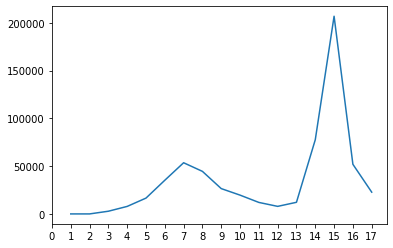

In [41]:
x = list(range(1,max_month+1))
plt.plot(x, avg_month)
plt.yticks(np.arange(0, 200001, 50000))
plt.xticks(np.arange(0, 18,1))

"Month-Plot:"

According to the graph, Considering that wave 1 peak lies between month number 5 and 13 and wave 2 peak lies between month number 13 and 18

In [42]:
mth_wav1 = list(range(5,13))
mth_wav2 = list(range(13,18))
print(mth_wav1,mth_wav2)

[5, 6, 7, 8, 9, 10, 11, 12] [13, 14, 15, 16, 17]


Creating lists for wave 1 and wave 2 peak week ids

In [43]:
dist_wk_wav1_pk = [0]* int(len(dist_week_data)/len(avg_week))
dist_wk_wav2_pk = [0]* int(len(dist_week_data)/len(avg_week))

Getting the wave 1 peak week ids for all districts and getting the keys for all districts

In [44]:
dist_names = [None]* int(len(dist_week_data)/len(avg_week))
k=0
for i in range(0,len(dist_week_data),len(avg_week)):
    dist_names[int(i/len(avg_week))]=dist_week_data['districtid'][i]
    pk=0
    pw=0
    for j in wk_wav1:
        if dist_week_data['cases'][i+j-1] > pk:
            pk=dist_week_data['cases'][i+j-1]
            pw=dist_week_data['weekid'][i+j-1]
    dist_wk_wav1_pk[int(i/len(avg_week))] = pw

In [45]:
dist_wk_wav1_pk

[39,
 45,
 48,
 50,
 42,
 42,
 51,
 48,
 49,
 40,
 52,
 52,
 49,
 57,
 59,
 42,
 62,
 57,
 57,
 56,
 60,
 62,
 55,
 62,
 57,
 53,
 41,
 54,
 57,
 68,
 63,
 49,
 60,
 61,
 63,
 45,
 47,
 60,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 43,
 43,
 44,
 41,
 43,
 42,
 42,
 42,
 43,
 43,
 43,
 42,
 38,
 43,
 43,
 43,
 41,
 47,
 44,
 43,
 45,
 43,
 44,
 41,
 60,
 41,
 43,
 41,
 43,
 42,
 42,
 43,
 43,
 43,
 42,
 54,
 42,
 43,
 52,
 73,
 54,
 65,
 68,
 55,
 52,
 52,
 54,
 54,
 53,
 54,
 63,
 53,
 67,
 67,
 53,
 54,
 53,
 54,
 72,
 51,
 53,
 65,
 53,
 60,
 56,
 0,
 69,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45,
 40,
 47,
 0,
 0,
 55,
 73,
 73,
 58,
 73,
 45,
 35,
 54,
 67,
 40,
 87,
 47,
 63,
 43,
 44,
 57,
 74,
 58,
 73,
 59,
 76,
 71,
 38,
 45,
 72,
 43,
 49,
 58,
 40,
 50,
 49,
 59,
 39,
 77,
 76,
 73,
 77,
 77,
 72,
 71,
 73,
 75,
 54,
 76,
 53,
 53,
 69,
 69,
 72,
 53,
 73,
 71,
 52,
 53,
 49,
 52,
 

Getting the wave 2 peak week ids for all districts

In [46]:
k=0
for i in range(0,len(dist_week_data),len(avg_week)):
    pk=0
    pw=0
    for j in wk_wav2:
        if dist_week_data['cases'][i+j-1] > pk:
            pk=dist_week_data['cases'][i+j-1]
            pw=dist_week_data['weekid'][i+j-1]
    dist_wk_wav2_pk[int(i/len(avg_week))] = pw

In [47]:
dist_wk_wav2_pk

[121,
 123,
 124,
 121,
 125,
 119,
 123,
 122,
 119,
 123,
 123,
 123,
 121,
 128,
 125,
 129,
 138,
 139,
 130,
 136,
 140,
 139,
 138,
 117,
 120,
 126,
 125,
 135,
 140,
 139,
 140,
 125,
 139,
 125,
 125,
 136,
 138,
 140,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 119,
 119,
 117,
 117,
 117,
 117,
 115,
 116,
 119,
 121,
 117,
 118,
 119,
 116,
 116,
 120,
 118,
 119,
 116,
 119,
 119,
 120,
 117,
 118,
 117,
 119,
 117,
 117,
 118,
 120,
 116,
 118,
 119,
 118,
 117,
 118,
 118,
 118,
 120,
 117,
 116,
 120,
 113,
 122,
 129,
 114,
 120,
 118,
 112,
 113,
 120,
 117,
 119,
 118,
 120,
 118,
 119,
 121,
 119,
 112,
 113,
 136,
 122,
 121,
 118,
 0,
 116,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 116,
 119,
 122,
 0,
 0,
 118,
 122,
 122,
 122,
 121,
 117,
 118,
 121,
 120,
 121,
 118,
 122,
 119,
 120,
 119,
 122,
 120,
 121,
 120,
 120,
 119,
 120,
 118,
 120,
 117,
 123,
 114,
 120,
 116,


Creating lists for wave 1 and wave 2 peak month ids for all districts

In [48]:
dist_mth_wav1_pk = [0]* int(len(dist_month_data)/len(avg_month))
dist_mth_wav2_pk = [0]* int(len(dist_month_data)/len(avg_month))

Getting the wave 1 peak month ids for all districts

In [49]:
k=0
for i in range(0,len(dist_month_data),len(avg_month)):
    pk=0
    pw=0
    for j in mth_wav1:
        if dist_month_data['cases'][i+j-1] > pk:
            pk=dist_month_data['cases'][i+j-1]
            pm=dist_month_data['monthid'][i+j-1]
    dist_mth_wav1_pk[int(i/len(avg_month))] = pm

In [50]:
dist_mth_wav1_pk

[5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 7,
 7,
 5,
 6,
 7,
 7,
 6,
 7,
 7,
 6,
 6,
 5,
 6,
 5,
 7,
 7,
 8,
 7,
 6,
 7,
 7,
 6,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 9,
 8,
 7,
 9,
 7,
 6,
 6,
 6,
 9,
 6,
 6,
 8,
 6,
 7,
 7,
 6,
 6,
 6,
 7,
 8,
 6,
 6,
 7,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 5,
 5,
 5,
 5,
 6,
 7,
 9,
 7,
 8,
 7,
 6,
 9,
 6,
 6,
 10,
 7,
 9,
 5,
 9,
 7,
 9,
 6,
 9,
 7,
 9,
 8,
 5,
 6,
 8,
 5,
 6,
 9,
 5,
 5,
 8,
 7,
 5,
 9,
 9,
 8,
 9,
 8,
 8,
 8,
 9,
 8,
 6,
 9,
 6,
 6,
 8,
 8,
 8,
 6,
 8,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 7,
 6,
 6,
 7,
 5,
 6,
 6,
 7,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 6,

Getting the wave 2 peak month ids for all districts

In [51]:
k=0
for i in range(0,len(dist_month_data),len(avg_month)):
    pk=0
    pw=0
    for j in mth_wav2:
        if dist_month_data['cases'][i+j-1] > pk:
            pk=dist_month_data['cases'][i+j-1]
            pm=dist_month_data['monthid'][i+j-1]
    dist_mth_wav2_pk[int(i/len(avg_month))] = pm

In [52]:
dist_mth_wav2_pk

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 15,
 16,
 16,
 16,
 16,
 14,
 14,
 17,
 15,
 15,
 16,
 16,
 16,
 15,
 16,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 14,
 15,
 14,
 14,
 14,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 14,
 14,
 14,
 13,
 13,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


Exporting the peak week and month ids for each district for both waves into data frame

In [53]:
data_final = {'ID':dist_names, 'wave1-weekid':dist_wk_wav1_pk, 'wave2-weekid':dist_wk_wav2_pk, 'wave1-monthid':dist_mth_wav1_pk, 'wave2-monthid':dist_mth_wav2_pk}
data_fr = pd.DataFrame(data_final)
data_fr

,ID,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
0,AP_Anantapur,39,121,5,14
1,AP_Chittoor,45,123,6,14
2,AP_East Godavari,48,124,5,14
3,AP_Guntur,50,121,5,14
4,AP_Krishna,42,125,5,14
...,...,...,...,...,...
709,WB_Purba Bardhaman,64,119,7,14
710,WB_Purba Medinipur,67,123,6,14
711,WB_Purulia,53,116,7,14
712,WB_South 24 Parganas,65,123,5,14


Exporting the dataframe to district-peaks.csv

In [54]:
data_fr.to_csv('district-peaks.csv',index=False)

Getting list of all state codes from the district keys

In [55]:
st_lst=[]
for i in dist_names:
    if i.split('_')[0] not in st_lst:
        st_lst.append(i.split('_')[0])
st_lst

['AP',
 'AR',
 'AS',
 'BR',
 'CH',
 'CT',
 'DL',
 'DN',
 'GA',
 'GJ',
 'HP',
 'HR',
 'JH',
 'JK',
 'KA',
 'KL',
 'LA',
 'MH',
 'ML',
 'MN',
 'MP',
 'MZ',
 'NL',
 'OR',
 'PB',
 'PY',
 'RJ',
 'SK',
 'TG',
 'TN',
 'TR',
 'UP',
 'UT',
 'WB']

In [56]:
dist_week_data

,districtid,weekid,cases
0,AP_Anantapur,1,0
1,AP_Anantapur,2,0
2,AP_Anantapur,3,0
3,AP_Anantapur,4,0
4,AP_Anantapur,5,0
...,...,...,...
104953,WB_Uttar Dinajpur,143,127
104954,WB_Uttar Dinajpur,144,132
104955,WB_Uttar Dinajpur,145,129
104956,WB_Uttar Dinajpur,146,126


Calculating the number of cases per week for each state by adding all the district cases per week 

In [57]:
st_wk_cases = [[0]* len(avg_week)]*len(st_lst)

for j in range(len(st_lst)):
    stst = [0]*len(avg_week)
    for i in range(len(dist_names)):
        for k in range(len(avg_week)):
             if dist_week_data['weekid'][(i*len(avg_week))+k] == k+1 and st_lst[j] == dist_week_data['districtid'][(i*len(avg_week))+k].split('_')[0]:
                stst[k]=stst[k]+dist_week_data['cases'][(i*len(avg_week))+k]
    st_wk_cases[j]=stst

In [58]:
st_wk_cases

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1014,
  1051,
  985,
  972,
  875,
  803,
  715,
  713,
  816,
  792,
  967,
  1162,
  1573,
  1865,
  2559,
  3316,
  4465,
  5652,
  7033,
  8486,
  9961,
  11714,
  16091,
  21905,
  31605,
  44385,
  63753,
  72188,
  80426,
  85486,
  90425,
  88138,
  86725,
  89389,
  92208,
  97681,
  103076,
  100880,
  97271,
  95733,
  90279,
  81763,
  70357,
  65794,
  58445,
  55282,
  49513,
  46624,
  41669,
  37102,
  32376,
  31469,
  26622,
  24575,
  21438,
  21434,
  20915,
  19757,
  16516,
  14770,
  12673,
  11571,
  6924,
  6166,
  5259,
  5078,
  4420,
  4355,
  3864,
  3700,
  3256,
  3194,
  2896,
  2607,
  2382,
  1987,
  1637,
  1473,
  1369,
  1289,
  1162,
  1012,
  845,
  797,
  607,
  604,
  603,
  667,
  826,
  921,
  1064,
  1268,
  1694,
  2083,
  2946,
  4715,
  7338,
  9417,
  13276,
  18666,
  28383,
  40469,
  60208,
  81471,
  107611,
  130752,
  170588,
  187392,
  197370,
  207467,
  209736,
  210683,
 

Getting average of number of cases per week for all states for each weeks

In [59]:
avg=[0]*len(avg_week)
for i in range(len(avg_week)):
    tmp=0
    for j in range(len(st_lst)):
        tmp=tmp+st_wk_cases[j][i]
    avg[i] = int(tmp/len(st_lst))
avg

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 663,
 782,
 1035,
 1204,
 1409,
 1533,
 1774,
 2032,
 2327,
 2386,
 2786,
 3132,
 3556,
 3926,
 4204,
 4408,
 4830,
 5243,
 5921,
 6412,
 7089,
 7682,
 8873,
 10101,
 11652,
 12842,
 14481,
 15494,
 16101,
 16896,
 17394,
 18086,
 18360,
 19007,
 19497,
 20495,
 21737,
 23058,
 24730,
 26311,
 27366,
 27343,
 26015,
 25772,
 25242,
 25192,
 24261,
 23354,
 21825,
 21052,
 19246,
 18076,
 16502,
 15626,
 14405,
 13979,
 13431,
 13251,
 12312,
 12265,
 12610,
 12674,
 11797,
 11257,
 10387,
 9932,
 8840,
 8530,
 7908,
 7776,
 7189,
 6906,
 6413,
 6289,
 6011,
 5891,
 5432,
 5225,
 4952,
 4838,
 4452,
 4271,
 4086,
 3948,
 3946,
 4185,
 4362,
 4732,
 4995,
 5319,
 5458,
 6076,
 7291,
 8933,
 11407,
 14040,
 16842,
 19885,
 26060,
 31560,
 41791,
 50959,
 64597,
 75327,
 86125,
 93576,
 99588,
 104295,
 103574,
 100946,
 86893,
 77450,
 66380,
 57552,
 46344,
 39765,
 31181,
 27309,
 21825,
 19262,
 16506,
 15574,
 13838,
 12823,
 12179,
 12048,

Plotting the graph of week number vs. average number of cases of all states per week

'State-week-Plot:'

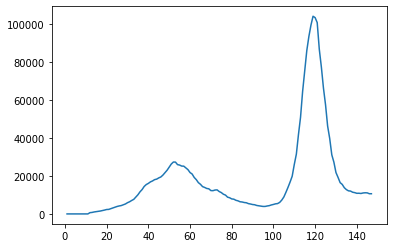

In [60]:
x = list(range(1,max_week+1))
plt.plot(x,avg )
#plt.yticks(np.arange(0, 500001, 100000))
#plt.xticks(np.arange(0, 18,1))

"State-week-Plot:"

According to the graph, the wave 1 week range and wave 2 range is same as that considered for districts. So, Considering the same wave 1 and wave 2 range of weeks

Creating list for getting the week number with peak number of cases for each state in wave 1 and wave 2

In [61]:
st_wk_wav1_pk = [0]* len(st_lst)
st_wk_wav2_pk = [0]* len(st_lst)

Getting the week number with peak number of cases for each state during the wave 1 week range

In [62]:
for i in range(len(st_lst)):
    pk=0
    pw=0
    for j in wk_wav1:
        if st_wk_cases[i][j-1] > pk:
            pk=st_wk_cases[i][j-1]
            pw=j
    st_wk_wav1_pk[i] = pw

Getting the week number with peak number of cases for each state during the wave 2 week range

In [63]:
for i in range(len(st_lst)):
    pk=0
    pw=0
    for j in wk_wav2:
        if st_wk_cases[i][j-1] > pk:
            pk=st_wk_cases[i][j-1]
            pw=j
    st_wk_wav2_pk[i] = pw

Importing cowin_vaccine_data_districtwise.csv to get the names of states corresponding to their codes

In [64]:
cowin_data = pd.read_csv('cowin_vaccine_data_districtwise.csv',low_memory=False)

C:\Users\manda\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

Creating list of all state names corresponding to their state codes

In [65]:
state_list = [0]*len(st_lst)
for i in range(len(cowin_data)):
    for j in range(len(st_lst)):
        if(cowin_data['State_Code'][i] == st_lst[j]):
            state_list[j] = cowin_data['State'][i]
state_list

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Delhi',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Goa',
 'Gujarat',
 'Himachal Pradesh',
 'Haryana',
 'Jharkhand',
 'Jammu and Kashmir',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Maharashtra',
 'Meghalaya',
 'Manipur',
 'Madhya Pradesh',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Puducherry',
 'Rajasthan',
 'Sikkim',
 'Telangana',
 'Tamil Nadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

Getting the number of cases per month for all states by adding the number of cases for all the districts in that state

In [66]:
st_month_cases = [[0]* len(avg_month)]*len(st_lst)

for j in range(len(st_lst)):
    stst = [0]*len(avg_month)
    for i in range(len(dist_names)):
        for k in range(len(avg_month)):
             if dist_month_data['monthid'][(i*len(avg_month))+k] == k+1 and st_lst[j] == dist_month_data['districtid'][(i*len(avg_month))+k].split('_')[0]:
                stst[k]=stst[k]+dist_month_data['cases'][(i*len(avg_month))+k]
    st_month_cases[j]=stst

Taking the average of number of cases of all states per month

In [67]:
avg=[0]*len(avg_month)
for i in range(len(avg_month)):
    tmp=0
    for j in range(len(st_lst)):
        tmp=tmp+st_month_cases[j][i]
    avg[i] = int(tmp/len(st_lst))
avg

[0,
 1409,
 3926,
 8275,
 17606,
 26764,
 22255,
 13241,
 9829,
 6011,
 3948,
 6076,
 38797,
 103391,
 25949,
 11385,
 10697]

Plotting the graph of month number vs. average number of cases of all states per month

'State-month-Plot:'

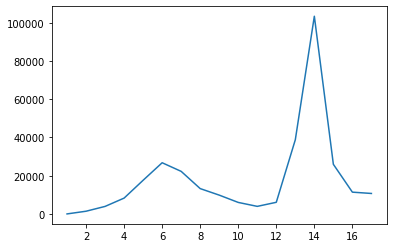

In [68]:
x = list(range(1,max_month+1))
plt.plot(x,avg )
#plt.yticks(np.arange(0, 500001, 100000))
#plt.xticks(np.arange(0, 18,1))

"State-month-Plot:"

Creating list for getting the month number with peak number of cases for all states in both waves

In [69]:
st_month_wav1_pk = [0]* len(st_lst)
st_month_wav2_pk = [0]* len(st_lst)

Getting month number with peak number of cases for all states in wave 1

In [70]:
for i in range(len(st_lst)):
    pk=0
    pw=0
    for j in mth_wav1:
        if st_month_cases[i][j-1] > pk:
            pk=st_month_cases[i][j-1]
            pw=j
    st_month_wav1_pk[i] = pw

Getting month number with peak number of cases for all states in wave 2

In [71]:
for i in range(len(st_lst)):
    pk=0
    pw=0
    for j in mth_wav2:
        if st_month_cases[i][j-1] > pk:
            pk=st_month_cases[i][j-1]
            pw=j
    st_month_wav2_pk[i] = pw

Exporting the peak week and month ids for each state into a dataframe

In [72]:
data_final = {'State':state_list, 'wave1-weekid':st_wk_wav1_pk, 'wave2-weekid':st_wk_wav2_pk, 'wave1-monthid':st_month_wav1_pk, 'wave2-monthid':st_month_wav2_pk}
data_fr = pd.DataFrame(data_final)
data_fr

,State,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
0,Andhra Pradesh,48,123,6,14
1,Arunachal Pradesh,60,140,7,16
2,Assam,0,0,0,0
3,Bihar,43,118,5,14
4,Chandigarh,52,120,6,14
5,Chhattisgarh,52,113,6,14
6,Delhi,69,116,8,14
7,Dadra and Nagar Haveli and Daman and Diu,43,116,5,14
8,Goa,0,0,0,0
9,Gujarat,57,118,6,14


Exporting the data frame to state-peaks.csv

In [73]:
data_fr.to_csv('state-peaks.csv',index=False)

Getting overall cases per week 

In [74]:
overall_wk_cases = [0]* len(avg_week)
for k in range(len(avg_week)):
    for i in range(len(st_lst)):
        overall_wk_cases[k]=overall_wk_cases[k]+st_wk_cases[i][k]

In [75]:
overall_wk_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 22574,
 26606,
 35191,
 40955,
 47934,
 52132,
 60327,
 69109,
 79133,
 81132,
 94744,
 106517,
 120926,
 133499,
 142943,
 149896,
 164233,
 178294,
 201339,
 218026,
 241049,
 261200,
 301694,
 343437,
 396190,
 436643,
 492354,
 526819,
 547465,
 574466,
 591426,
 614929,
 624273,
 646265,
 662921,
 696836,
 739068,
 783995,
 840851,
 894582,
 930475,
 929694,
 884524,
 876280,
 858238,
 856543,
 824884,
 794047,
 742078,
 715797,
 654391,
 614609,
 561088,
 531301,
 489802,
 475288,
 456659,
 450553,
 418628,
 417043,
 428771,
 430935,
 401126,
 382769,
 353167,
 337691,
 300584,
 290046,
 268875,
 264396,
 244440,
 234824,
 218047,
 213847,
 204393,
 200315,
 184711,
 177663,
 168380,
 164492,
 151369,
 145218,
 138945,
 134253,
 134196,
 142319,
 148339,
 160901,
 169849,
 180864,
 185603,
 206600,
 247896,
 303733,
 387867,
 477386,
 572653,
 676105,
 886065,
 1073066,
 1420908,
 1732615,
 2196311,
 2561151,
 2928276,
 3181586,
 33859

Considering the same range of week ids for both waves for overall cases

Getting the week id with peak number of cases in wave 1

In [76]:
overall_wk_wav1_pk=0
for i in wk_wav1:
    if overall_wk_cases[i-1]> overall_wk_cases[overall_wk_wav1_pk-1]:
        overall_wk_wav1_pk = i

Getting the week id with peak number of cases in wave 2

In [77]:
overall_wk_wav2_pk=0
for i in wk_wav2:
    if overall_wk_cases[i-1]> overall_wk_cases[overall_wk_wav2_pk-1]:
        overall_wk_wav2_pk = i

Getting the overall number of cases per month 

In [78]:
overall_month_cases = [0]* len(avg_month)
for k in range(len(avg_month)):
    for i in range(len(st_lst)):
        overall_month_cases[k]=overall_month_cases[k]+st_month_cases[i][k]

Getting the month id with peak number of cases in wave 1

In [79]:
overall_month_wav1_pk=0
for i in mth_wav1:
    if overall_month_cases[i-1]> overall_month_cases[overall_month_wav1_pk-1]:
        overall_month_wav1_pk =i

Getting the month id with peak number of cases in wave 2

In [80]:
overall_month_wav2_pk=0
for i in mth_wav2:
    if overall_month_cases[i-1]> overall_month_cases[overall_month_wav2_pk-1]:
        overall_month_wav2_pk = i

Creating data frame with  overall peak week and month IDs

In [81]:
data_final = {'Overall':['Overall'], 'wave1-weekid':[overall_wk_wav1_pk], 'wave2-weekid':[overall_wk_wav2_pk], 'wave1-monthid':[overall_month_wav1_pk], 'wave2-monthid':[overall_month_wav2_pk]}
data_fr = pd.DataFrame(data_final)
data_fr

,Overall,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
0,Overall,52,119,6,14


Exporting data frame to overall-peaks.csv

In [82]:
data_fr.to_csv("overall-peaks.csv",index=False)